# ⚖ A Baseline for comparision

See, there can be moments when your model ***might*** perform with 97% accuracy but still without a context that would be **meaningless**. We need a **relative figure**.

> This is somewhat related with `R2 score` where we are comparing our model's ability to capture variance **in context** to the another model — `Naive Model` or the *simplest model*.

### Naive == Basic Model?

It is often observable that in the cases when you see the model's performance is shown **not solely** but **with other models**. 

<img src="../images/baseline_comparision.png" height=500 width=300>

### In forecasting, what is Naive?

It is something that we have already discussed, the base, the markov and you've guessed it!: **The random walk model** which just `ffill`s the previous value to the future! 

That's our naive model.

<img src="../images/naive.png" height=300 width=500>

### 

### 🏋️‍♂️ Now, we will see that "Naive" in action
*(Just a little bit)*

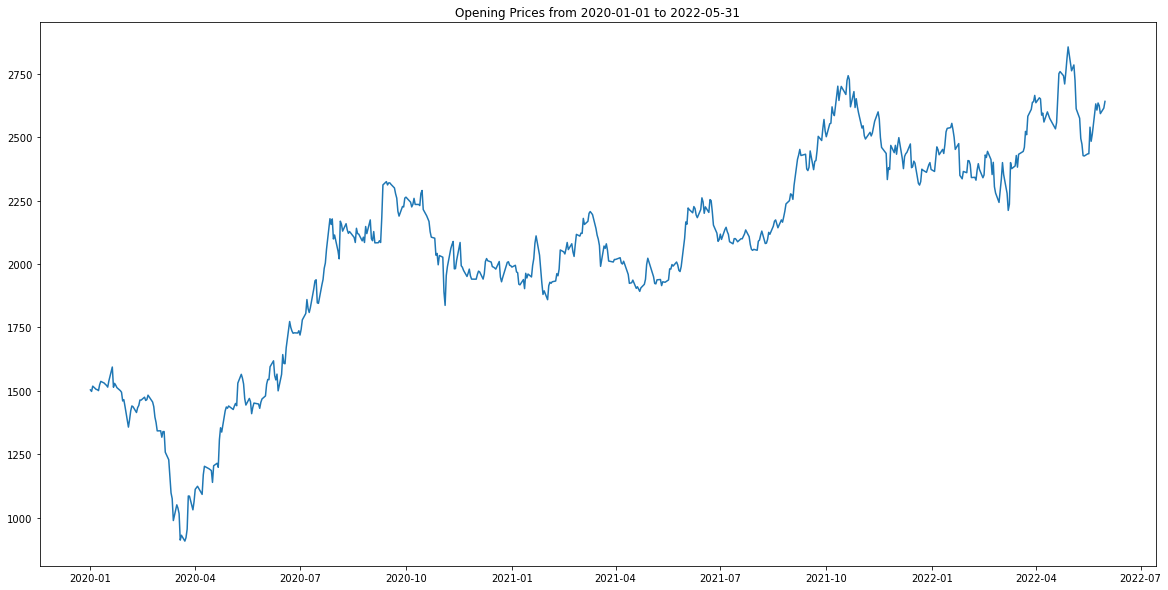

In [46]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
  
# initializing Parameters
start = "2020-01-01"
end = "2022-05-31"
symbols = ["RELIANCE.NS"]
  
# Getting the data
data = pdr.get_data_yahoo(symbols, start, end)
  
# Display
plt.figure(figsize=(20, 10))
plt.title('Opening Prices from {} to {}'.format(start, end))
plt.plot(data['Open'])
plt.show()

#### The Aim
- Here, we will use the *Naive* prediction for each day ***as if*** we don't know the next day price.
- Thus, the **price of today** will become **the price of tomorrow** (The naive part)
- Since we also have the ***true*** prices, we can then check the **error** using the learnt error metrics before.
- If you see, we will **only be** predicting 1 day price from now

In [8]:
data = data.droplevel(1, axis=1)
data.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-01,1485.053467,1495.424927,1512.760498,1491.363403,1503.745972,6463060.0
2020-01-02,1510.335571,1520.883545,1526.480469,1497.802368,1497.802368,8173308.0
2020-01-03,1512.155518,1522.716187,1527.173950,1508.699097,1518.605103,9684434.0
2020-01-06,1477.085083,1487.400879,1513.552979,1483.933838,1505.727173,11315596.0
2020-01-07,1499.809570,1510.284058,1520.091064,1499.288208,1504.736572,7699489.0


In [10]:
# Getting the metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [11]:
# We will only work with the "close" price data
df = data[["Close"]]

In [13]:
df.head()

Attributes,Close
Date,
2020-01-01,1495.424927
2020-01-02,1520.883545
2020-01-03,1522.716187
2020-01-06,1487.400879
2020-01-07,1510.284058


In [24]:
# Now (naive) prediction part — shifting
df["PredictedClose"] = df["Close"].shift(1)

In [25]:
df

Attributes,Close,PredictedClose
Date,,
2020-01-01,1495.424927,NaN
2020-01-02,1520.883545,1495.424927
2020-01-03,1522.716187,1520.883545
2020-01-06,1487.400879,1522.716187
2020-01-07,1510.284058,1487.400879
...,...,...
2022-05-25,2612.000000,2615.850098
2022-05-26,2587.100098,2612.000000
2022-05-27,2575.100098,2587.100098


So we are essentially done with the *initial* prediction! 🎉

In [28]:
# Ignoring the first row as it contains NaN
ytrue = df.iloc[1:, 0]
ypred = df.iloc[1:, 1]

#### $\text{MAE}$

In [32]:
mean_absolute_error(ytrue, ypred)

29.782684886594847

This means, the price of reliance varies `~Rs. 30` everyday

##### 

#### $\text{MSE}$

In [33]:
mean_squared_error(ytrue, ypred)

1658.1818923917856

This value is not directly interpretable, so we will use the RMSE

##### 

#### $\text{RMSE}$

In [34]:
mean_squared_error(ytrue, ypred, squared=False)

40.720779614243455

It means, if we calculate the error by squaring — then we will get `~Rs. 41` difference.

##### 

#### $\text{MAPE}$

In [37]:
mean_absolute_percentage_error(ytrue, ypred)

0.015455795994557014

- From the **MAPE**, we can say that on an average, RELIANCE varies `1.5%` from its previous price.
- If today it closes at `Rs. 100` then on an average tomorrow it can be closing on either `Rs. 98.5` *or* `Rs. 101.5`
- It matches with out MAE being 29.75. 
- With that saying, `df.mean() == 2058` and `2058 * 0.015` = `30.86` *(1.5% of mean)* which is pretty close to **MAE**

> Moral of the story: `The price of Reliance varies 1.5% on an average of the previous price`.

##### 

#### $R^2$

In [31]:
r2_score(ytrue, ypred)

0.9899395260973729

**Lession** <br>
- So with the **simplest** prediction, we are able to capture 98% of the variance
- Are we good? Need to be suspicious.
- The stock prices don't vary too much (unlike crpyto)
- So, the ***dumbest*** prediction of all (predicting the next day's price as the previous) still gives the 98% of $R^2$
- A model which can give us the high accuracy in the upcoming videos, we need to be careful because **they might simply** be giveing same result as this Naive ones!

##### 

#### $\text{sMAPE}$

### $ \frac{\sum\frac{|\hat y - y|}{\frac{|\hat y| + |y|}{2}}}{N}$

In [51]:
def sMAPE(ytrue, ypred):
    numerator = np.abs(ypred - ytrue)
    denominator = np.abs(ypred) + np.abs(ytrue)
    return (numerator / (denominator / 2)).sum() / len(ytrue)

In [52]:
sMAPE(ytrue, ypred)

0.015466992372200871

Both, **MAPE** and **sMAPE** are pretty similar. 

# 

# Great stuff!
Next up, we will meet in the next section where we will start the ***actual*** things!!